In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns

In [21]:
# ヒートマップの描画関数
def draw_pcm(partial_corr_matrix):
    plt.figure(figsize=(20, 10))

    ax = sns.heatmap(partial_corr_matrix, 
                annot=True, 
                fmt='g', 
                cmap='Blues', 
                annot_kws={"size":7})

    sns.set(font_scale = 2)

    ax.xaxis.tick_top()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

    plt.savefig('./output/heatmap.png')

In [28]:
df = pd.read_excel('../data/230724_0804_AI用qPCRデータ.xlsx', index_col=0, header=1)
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df.head()

,glk,agp,yihX,pgm,ptsG,malx,crr,galM,yihR,yeaD,...,tpiA,gapA,pgk,gpmA,ytjc,gpmM,eno,pykF,pykA,ppsA
0,0.000004,2.982088e-05,0.000004,1.512045e-05,0.000015,9.403729e-07,0.000122,0.000015,4.792578e-07,0.000007,...,0.000008,0.000121,1.193258e-07,0.000119,0.000004,0.000008,0.000015,0.000030,0.000015,0.000030
1,0.000008,3.062644e-05,0.000016,2.940716e-08,0.000015,3.847846e-06,0.000124,0.000015,3.848767e-06,0.000015,...,0.000015,0.000123,2.377373e-07,0.000123,0.000008,0.000016,0.000031,0.000061,0.000031,0.000061
2,0.000008,7.608227e-06,0.000016,1.396326e-08,0.000031,9.615077e-07,0.000245,0.000015,4.864569e-07,0.000031,...,0.000015,0.000122,9.666787e-07,0.000122,0.000008,0.000016,0.000062,0.000062,0.000031,0.000062
3,0.000004,1.513944e-05,0.000015,1.225795e-07,0.000015,4.807837e-07,0.000124,0.000015,1.207673e-07,0.000008,...,0.000015,0.000061,2.410427e-07,0.000061,0.000004,0.000008,0.000031,0.000062,0.000031,0.000062
4,0.000008,4.768491e-07,0.000031,6.105349e-08,0.000031,9.593193e-07,0.000124,0.000015,2.428970e-07,0.000016,...,0.000016,0.000124,4.795912e-07,0.000124,0.000008,0.000008,0.000031,0.000062,0.000031,0.000062


In [29]:
# 偏相関行列の計算
partial_corr_matrix = pg.pcorr(df).round(3)
partial_corr_matrix.head()

,glk,agp,yihX,pgm,ptsG,malx,crr,galM,yihR,yeaD,...,tpiA,gapA,pgk,gpmA,ytjc,gpmM,eno,pykF,pykA,ppsA
glk,1.000,0.108,0.241,0.322,-0.242,-0.118,-0.141,-0.070,-0.131,-0.105,...,0.237,-0.051,-0.095,-0.191,0.572,0.289,-0.012,0.061,-0.114,-0.121
agp,0.108,1.000,-0.026,0.108,-0.016,0.148,0.386,0.253,0.169,-0.115,...,0.190,0.114,0.267,0.071,-0.087,-0.247,0.032,0.086,0.083,-0.009
yihX,0.241,-0.026,1.000,-0.114,0.183,0.081,0.106,0.178,0.042,0.115,...,0.048,0.025,0.149,-0.101,-0.062,-0.275,0.055,0.106,0.076,-0.186
pgm,0.322,0.108,-0.114,1.000,0.494,0.115,0.174,0.062,0.158,0.160,...,-0.373,0.467,0.278,-0.035,-0.306,-0.299,0.143,-0.060,0.037,-0.085
ptsG,-0.242,-0.016,0.183,0.494,1.000,0.036,-0.040,-0.159,0.168,0.079,...,0.162,-0.194,-0.246,-0.080,0.256,0.095,-0.137,0.064,-0.002,-0.041


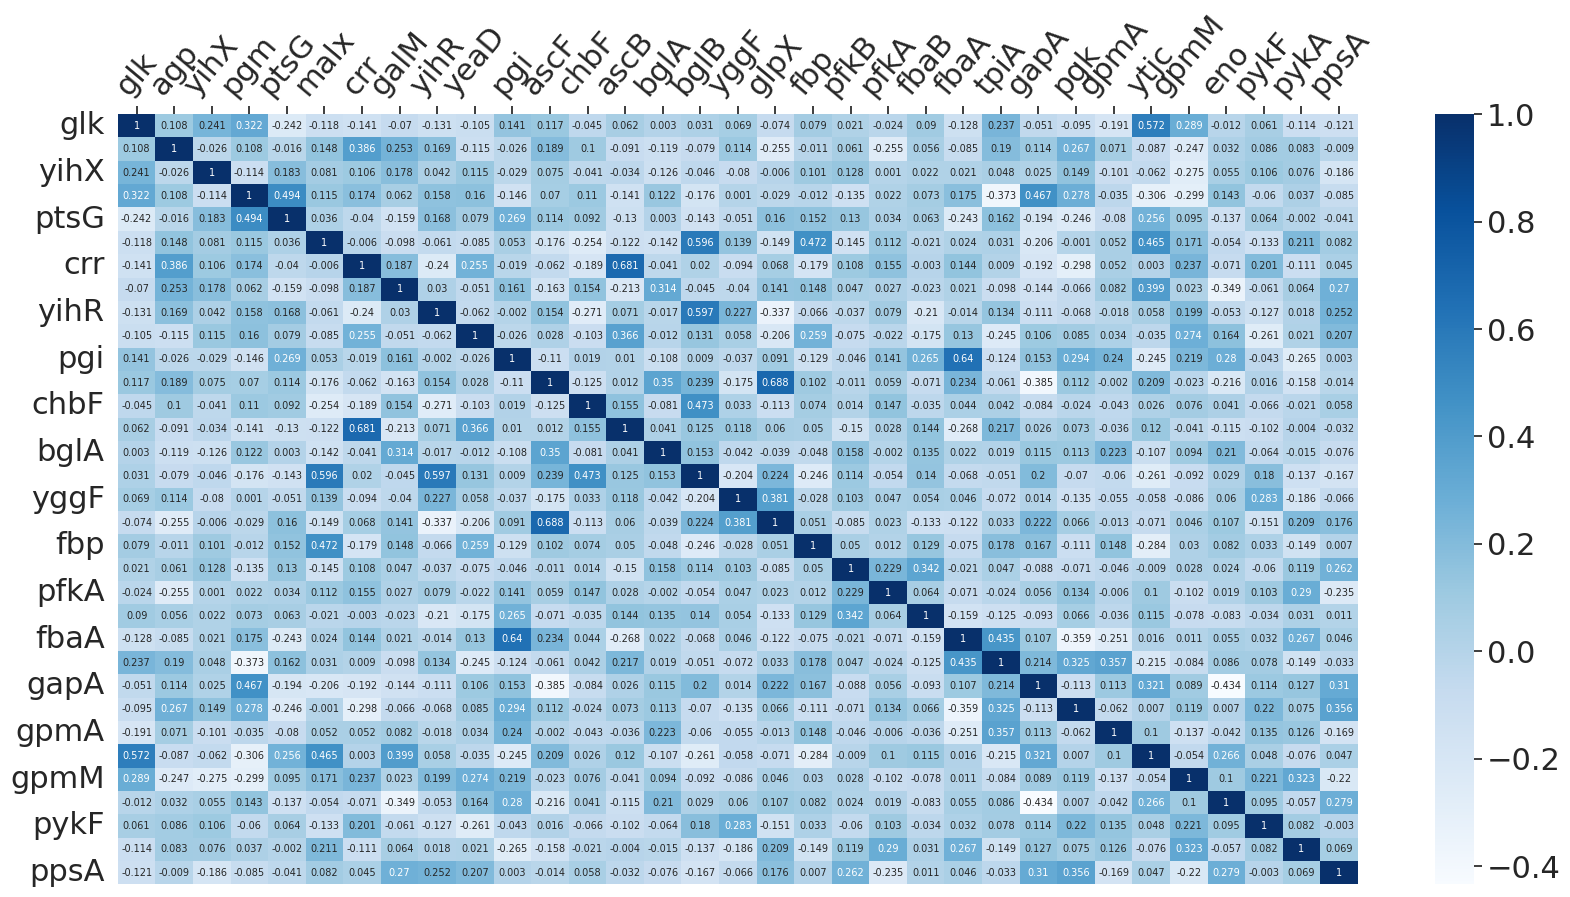

In [30]:
draw_pcm(partial_corr_matrix)

In [31]:
# yとの相関係数を表示
corr_y = pd.DataFrame({"features":df.columns,"corr_y":partial_corr_matrix["ascF"]},index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

,features,corr_y
0,glk,0.117000
1,agp,0.189000
2,yihX,0.075000
3,pgm,0.070000
4,ptsG,0.114000
5,malx,-0.176000
6,crr,-0.062000
7,galM,-0.163000
8,yihR,0.154000
9,yeaD,0.028000


In [51]:
# 連続値 →　離散値に変更
df_new = df.copy()

for i in range(len(df_new.columns)):
    df_new.iloc[:, i] = pd.cut(df_new.iloc[:, i], 5)

df_new.head()

,glk,agp,yihX,pgm,ptsG,malx,crr,galM,yihR,yeaD,...,tpiA,gapA,pgk,gpmA,ytjc,gpmM,eno,pykF,pykA,ppsA
0,"(3.65e-06, 1.55e-05]","(2.52e-05, 4.99e-05]","(3.56e-06, 2.81e-05]","(1.26e-05, 2.53e-05]","(3.63e-06, 5.31e-05]","(2.3e-07, 1.75e-06]","(2.63e-05, 0.000821]","(1.37e-05, 1.95e-05]","(4.41e-08, 3.22e-06]","(1.09e-06, 0.000102]",...,"(1.34e-06, 5.1e-05]","(0.00011, 0.000207]","(-4e-07, 0.000104]","(0.000119, 0.000213]","(4.62e-07, 6.68e-06]","(-1.21e-07, 2.5e-05]","(1.18e-06, 0.000399]","(-2.33e-07, 4.97e-05]","(1.29e-05, 2.54e-05]","(2.91e-06, 5.29e-05]"
1,"(3.65e-06, 1.55e-05]","(2.52e-05, 4.99e-05]","(3.56e-06, 2.81e-05]","(-5.55e-08, 1.26e-05]","(3.63e-06, 5.31e-05]","(3.26e-06, 4.78e-06]","(2.63e-05, 0.000821]","(1.37e-05, 1.95e-05]","(3.22e-06, 6.39e-06]","(1.09e-06, 0.000102]",...,"(1.34e-06, 5.1e-05]","(0.00011, 0.000207]","(-4e-07, 0.000104]","(0.000119, 0.000213]","(6.68e-06, 1.29e-05]","(-1.21e-07, 2.5e-05]","(1.18e-06, 0.000399]","(4.97e-05, 9.94e-05]","(2.54e-05, 3.79e-05]","(5.29e-05, 0.000103]"
2,"(3.65e-06, 1.55e-05]","(3.53e-07, 2.52e-05]","(3.56e-06, 2.81e-05]","(-5.55e-08, 1.26e-05]","(3.63e-06, 5.31e-05]","(2.3e-07, 1.75e-06]","(2.63e-05, 0.000821]","(1.37e-05, 1.95e-05]","(4.41e-08, 3.22e-06]","(1.09e-06, 0.000102]",...,"(1.34e-06, 5.1e-05]","(0.00011, 0.000207]","(-4e-07, 0.000104]","(0.000119, 0.000213]","(6.68e-06, 1.29e-05]","(-1.21e-07, 2.5e-05]","(1.18e-06, 0.000399]","(4.97e-05, 9.94e-05]","(2.54e-05, 3.79e-05]","(5.29e-05, 0.000103]"
3,"(3.65e-06, 1.55e-05]","(3.53e-07, 2.52e-05]","(3.56e-06, 2.81e-05]","(-5.55e-08, 1.26e-05]","(3.63e-06, 5.31e-05]","(2.3e-07, 1.75e-06]","(2.63e-05, 0.000821]","(1.37e-05, 1.95e-05]","(4.41e-08, 3.22e-06]","(1.09e-06, 0.000102]",...,"(1.34e-06, 5.1e-05]","(1.21e-05, 0.00011]","(-4e-07, 0.000104]","(2.46e-05, 0.000119]","(4.62e-07, 6.68e-06]","(-1.21e-07, 2.5e-05]","(1.18e-06, 0.000399]","(4.97e-05, 9.94e-05]","(2.54e-05, 3.79e-05]","(5.29e-05, 0.000103]"
4,"(3.65e-06, 1.55e-05]","(3.53e-07, 2.52e-05]","(2.81e-05, 5.26e-05]","(-5.55e-08, 1.26e-05]","(3.63e-06, 5.31e-05]","(2.3e-07, 1.75e-06]","(2.63e-05, 0.000821]","(1.37e-05, 1.95e-05]","(4.41e-08, 3.22e-06]","(1.09e-06, 0.000102]",...,"(1.34e-06, 5.1e-05]","(0.00011, 0.000207]","(-4e-07, 0.000104]","(0.000119, 0.000213]","(6.68e-06, 1.29e-05]","(-1.21e-07, 2.5e-05]","(1.18e-06, 0.000399]","(4.97e-05, 9.94e-05]","(2.54e-05, 3.79e-05]","(5.29e-05, 0.000103]"
